In [56]:
import numpy as np
from scipy.spatial.distance import cdist
from sklearn.datasets import make_blobs
import pandas as pd
import seaborn as sns
import random
from cluster import (
        KMeans, 
        Silhouette, 
        make_clusters,
        plot_clusters,
        plot_multipanel)

In [8]:
# define vars
k=3
# mat=np.random.randint(100, size=(30,2))
mat, observed_labels=make_blobs(n_samples=100, centers=k)


<Axes: xlabel='x', ylabel='y'>

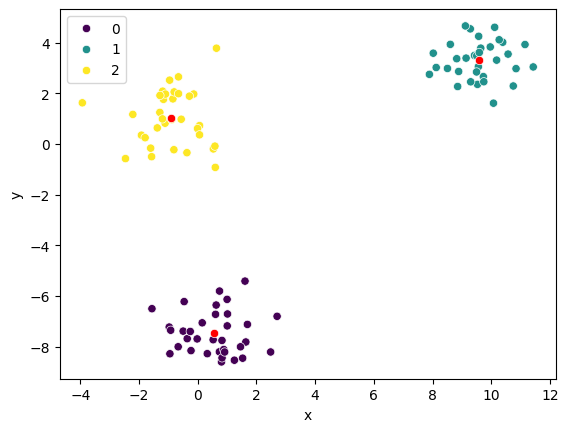

In [9]:
# visualize ground truth cluster labels
mat_df=pd.DataFrame(mat, columns=['x','y'])
mat_df['cluster']=observed_labels

# get true centroids
observed_centroids=[]
for c in set(observed_labels):
    mat_df_cluster=mat_df[mat_df['cluster']==c] # .drop(['cluster'], axis=1)
    observed_centroids.append(list(mat_df_cluster.mean()))
observed_centroids_df=pd.DataFrame(observed_centroids, columns=['x','y','cluster'])

# plot points with centroids
sns.scatterplot(data=mat_df, x='x', y='y', hue='cluster', palette='viridis')
sns.scatterplot(data=observed_centroids_df, x='x', y='y', color='red')


In [57]:
# initialize centroids
random.seed(76)
centroids=mat[np.random.choice(mat.shape[0], k, replace=False),:]

# get distances
cdist_mat=cdist(mat, centroids)
predicted_labels=np.argmin(cdist_mat, axis=1)


<Axes: xlabel='x', ylabel='y'>

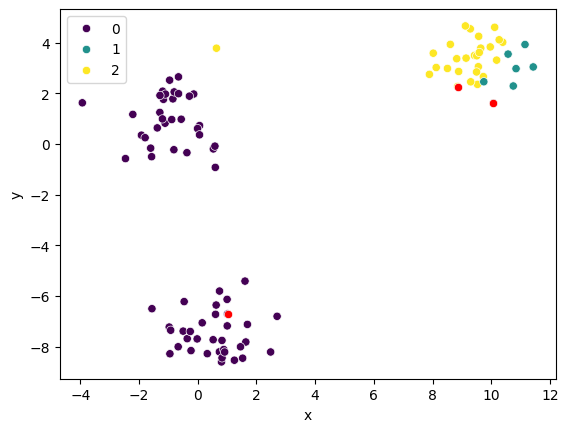

In [48]:
# visualize predicted cluster labels
mat_df=pd.DataFrame(mat, columns=['x','y'])
mat_df['cluster']=predicted_labels
predicted_centroids_df=pd.DataFrame(centroids, columns=['x','y'])

# plot points with centroids
sns.scatterplot(data=mat_df, x='x', y='y', hue='cluster', palette='viridis')
sns.scatterplot(data=predicted_centroids_df, x='x', y='y', color='red')

In [134]:
# make data
mat, observed_labels=make_blobs(n_samples=100, centers=k)

In [135]:
# get error function
def get_error(mat, predicted_labels, centroids):
    sse=0
    for c in set(predicted_labels):
        mat_cluster=mat[np.where(predicted_labels==c)]
        se=np.sum((mat_cluster-[centroids[c]])**2)
        sse+=se
    mse=sse/len(mat)
    return mse

# initialize centroids
centroids=mat[np.random.choice(mat.shape[0], k, replace=False),:]

# fit centroids to data
itr=0
old_centroids=[]
max_iter=10

# fitting loop
while itr<max_iter:

    cdist_mat=cdist(mat, centroids)
    predicted_labels=np.argmin(cdist_mat, axis=1)
    old_centroids=centroids
    print(get_error(mat, predicted_labels, centroids))

    updated_centroids=[]
    for c in set(predicted_labels):
        mat_cluster=mat[np.where(predicted_labels==c)]
        updated_centroids.append(np.mean(mat_cluster, axis=0))
    centroids=updated_centroids
    
    itr+=1

# final error
print(get_error(mat, predicted_labels, centroids))

17.11395730158425
4.100190444310443
2.09093138425526
2.09093138425526
2.09093138425526
2.09093138425526
2.09093138425526
2.09093138425526
2.09093138425526
2.09093138425526
2.09093138425526


<Axes: xlabel='x', ylabel='y'>

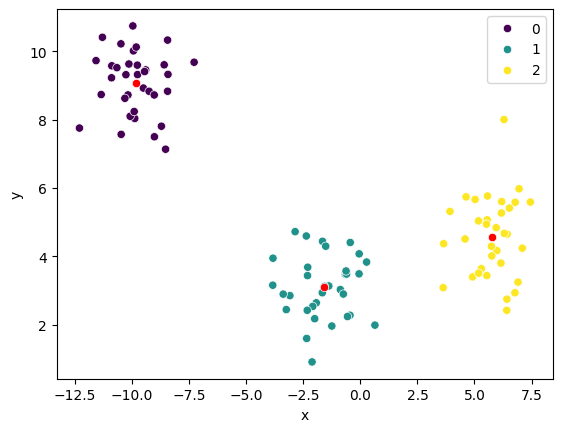

In [136]:
# visualize predicted cluster labels
mat_df=pd.DataFrame(mat, columns=['x','y'])
mat_df['cluster']=predicted_labels
predicted_centroids_df=pd.DataFrame(centroids, columns=['x','y'])

# plot points with centroids
sns.scatterplot(data=mat_df, x='x', y='y', hue='cluster', palette='viridis')
sns.scatterplot(data=predicted_centroids_df, x='x', y='y', color='red')

In [137]:
# fit via kmeans function
kmeans=KMeans(k=3, tol=1, max_iter=10)
kmeans.fit(mat)

<Axes: xlabel='x', ylabel='y'>

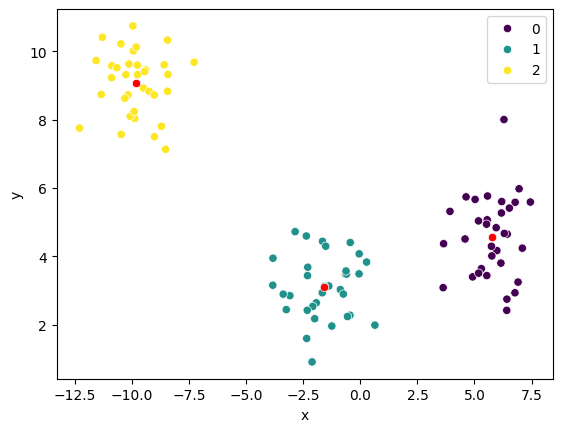

In [138]:
# visualize predicted cluster labels by kmeans function
mat_df=pd.DataFrame(kmeans.mat, columns=['x','y'])
mat_df['cluster']=kmeans.cluster_labels
predicted_centroids_df=pd.DataFrame(kmeans.centroids, columns=['x','y'])

# plot points with centroids
sns.scatterplot(data=mat_df, x='x', y='y', hue='cluster', palette='viridis')
sns.scatterplot(data=predicted_centroids_df, x='x', y='y', color='red')

In [85]:
# predicted_centroids_df
# predicted_labels
mat_df

,x,y,cluster
0,0.326144,-8.280852,2
1,-1.602215,-0.166720,0
2,-0.357584,-7.688346,2
3,11.427089,3.039776,1
4,9.284257,4.543043,1
...,...,...,...
95,7.890897,2.747063,1
96,-1.569871,-0.503519,0
97,9.297226,2.452654,1
98,-0.367164,-0.345328,0


In [103]:
mat_cluster=mat[np.where(predicted_labels==0)]
cdist(mat_cluster, [kmeans.centroids[0]])
(mat_cluster-[kmeans.centroids[0]])**2


array([[151.94390076,   4.03753894],
       [103.70816959,  12.33856922],
       [ 95.11593503,   1.52953791],
       [118.01747136,   7.83727791],
       [106.61308134,   6.07077392],
       [120.39356164,   0.33482438],
       [108.74226876,   1.74577337],
       [ 79.59875585,   6.51512998],
       [ 94.48794872,   5.45156671],
       [108.24085373,   6.00401908],
       [127.40341085,   8.9110191 ],
       [ 95.78123563,   3.3521117 ],
       [100.3225139 ,  13.16874565],
       [111.07982712,   7.57230463],
       [121.2943451 ,  12.78047334],
       [135.64471684,   1.58044159],
       [110.04510823,   6.66007036],
       [112.94083626,   2.65039017],
       [109.36428392,   4.07437341],
       [109.58989843,  10.36353413],
       [ 90.30787895,   8.41544012],
       [100.79867378,   5.55922298],
       [145.11721526,   8.37705423],
       [131.54993687,   6.33315207],
       [124.70092668,   9.4955772 ],
       [ 88.46266355,   3.80159762],
       [113.27503183,   2.0310319 ],
 

In [62]:
# tolerance function
np.mean(np.subtract(centroids, old_centroids)/old_centroids*100)

0.0

In [360]:
from sklearn.metrics import silhouette_score, silhouette_samples
from cluster import (
  make_clusters, 
  plot_clusters, 
  plot_multipanel,
  Silhouette)

from collections import Counter

In [348]:
# create sample data
mat, observed_labels = make_clusters(k=3)

# run kmeans fitting
kmeans=KMeans(k=3, tol=None, max_iter=20)
kmeans.fit(mat)

predicted_labels=kmeans.cluster_labels

In [303]:
# silhouette scoring
# for i in mat:
#     print(i)    

y_centers=[]
# get cluster centroids
for c in set(predicted_labels):
    mat_cluster=mat[np.where(predicted_labels==c)]
    y_centers.append(np.mean(mat_cluster, axis=0))

silhouette_scores=[]

# compute silhouette score for each point in the matrix
for obs_idx, c_idx in zip(range(len(mat)), range(len(predicted_labels))):

    # get point and center for that point
    obs=mat[obs_idx]
    c=predicted_labels[c_idx]

    # delete the point temporarily from the matrix
    mat_f=np.delete(mat, [obs_idx], axis=0)
    predicted_labels_f=np.delete(predicted_labels, [c_idx], axis=0)

    # get all points in the cluster
    mat_f_cluster=mat_f[np.where(predicted_labels_f==c)]

    # get next closest center
    arr=cdist([y_centers[c]], y_centers)
    arr_sorted=np.sort(arr)
    next_closest_center_idx=np.where(arr[0]==arr_sorted[0][1])[0][0]
    next_closest_center=y_centers[next_closest_center_idx]

    # get data from next closest center
    mat_f_cluster_next_closest=mat_f[np.where(predicted_labels_f==next_closest_center_idx)]

    # average distance from point to all other points within its same cluster and next closest cluster
    avg_inter_cluster_distance=np.mean(cdist([obs], mat_f_cluster))
    avg_next_cluster_distance=np.mean(cdist([obs], mat_f_cluster_next_closest))
    
    ss=(avg_next_cluster_distance-avg_inter_cluster_distance)/max(avg_next_cluster_distance, avg_inter_cluster_distance)
    silhouette_scores.append(ss)




In [365]:
from cluster import Silhouette

In [372]:
Silhouette().score(mat, predicted_labels)
# sil_scores=sil.score(X=mat, y=predicted_labels)
# print(sil)

In [355]:
sil_scores

In [304]:
np.mean(silhouette_scores)

0.6183642891929527

In [305]:
silhouette_score(mat, predicted_labels)

0.6183642891929528

In [309]:
((0.6183642891929528-0.6183642891929527)/0.6183642891929528)*100

1.7954190499489296e-14

In [307]:
silhouette_scores

[0.5000604192952005,
 0.49147849996146353,
 0.1231889988479987,
 0.36001012469208243,
 0.275571154071639,
 0.2866957279792131,
 0.36890641785466877,
 0.06165876486085443,
 0.34133135862691366,
 0.4328811232620182,
 0.42440144130566426,
 0.5108789946390687,
 0.43953200853866514,
 -0.004824377292687353,
 0.26959970073465167,
 0.342317278222193,
 0.27284203417990216,
 0.4883932827454172,
 0.5242105728206233,
 0.42605439240872933,
 0.389253878109642,
 0.44388339256279796,
 0.033352111067085376,
 0.20330932643585642,
 0.4833765612767766,
 0.2624860397468989,
 0.3459794546832109,
 0.42867808237819377,
 0.22175042697582992,
 0.5252428235468096,
 0.33015590069979217,
 0.10165964616156105,
 0.18791434692564166,
 0.09116690872390475,
 0.5111014428992133,
 0.49270177942192456,
 0.09756493063854232,
 0.30336315872609243,
 0.5147763130059071,
 0.26399992740738465,
 0.47151851094042835,
 0.18822832443806897,
 0.37297294116673,
 0.41748344233013013,
 0.44534801229047993,
 0.34428953876328666,
 0.4429

In [306]:
silhouette_samples(mat, predicted_labels)

array([ 0.50006042,  0.4914785 ,  0.123189  ,  0.36001012,  0.27557115,
        0.28669573,  0.36890642,  0.06165876,  0.34133136,  0.43288112,
        0.42440144,  0.51087899,  0.43953201, -0.00482438,  0.2695997 ,
        0.34231728,  0.27284203,  0.48839328,  0.52421057,  0.42605439,
        0.38925388,  0.44388339,  0.03335211,  0.20330933,  0.48337656,
        0.26248604,  0.34597945,  0.42867808,  0.22175043,  0.52524282,
        0.3301559 ,  0.10165965,  0.18791435,  0.09116691,  0.51110144,
        0.49270178,  0.09756493,  0.30336316,  0.51477631,  0.26399993,
        0.47151851,  0.18822832,  0.37297294,  0.41748344,  0.44534801,
        0.34428954,  0.44297531,  0.46230686,  0.07903379,  0.33297211,
        0.04922256,  0.40661491,  0.45592829,  0.22498684,  0.38158326,
        0.43004808,  0.45872619,  0.26194034,  0.47956731,  0.50988391,
        0.31642602,  0.26432208,  0.33768063,  0.52116144,  0.511018  ,
        0.53259728,  0.49730303,  0.532145  ,  0.30807504,  0.13

In [259]:
from sklearn.cluster import KMeans as sk_KMeans
kmeans=sk_KMeans(n_clusters=3, random_state=0, n_init="auto").fit(mat)
kmeans.labels_
# kmeans.predict([[0, 0], [12, 3]])
kmeans.cluster_centers_

array([[-1.61558208,  3.11235508],
       [-9.83138278,  9.08251993],
       [ 5.77375011,  4.57568678]])

<Axes: xlabel='x', ylabel='y'>

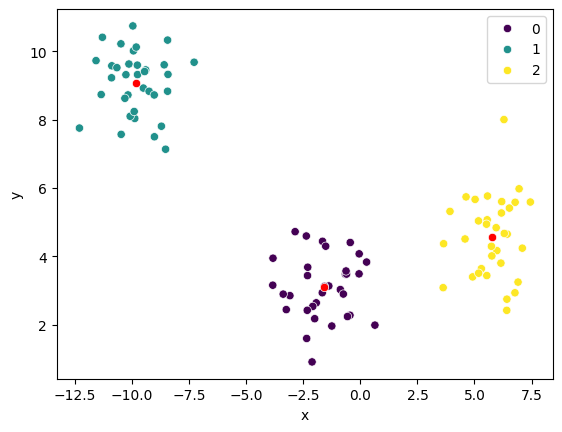

In [257]:
# visualize predicted cluster labels by kmeans function
mat_df=pd.DataFrame(mat, columns=['x','y'])
mat_df['cluster']=kmeans.labels_
predicted_centroids_df=pd.DataFrame(kmeans.cluster_centers_, columns=['x','y'])

# plot points with centroids
sns.scatterplot(data=mat_df, x='x', y='y', hue='cluster', palette='viridis')
sns.scatterplot(data=predicted_centroids_df, x='x', y='y', color='red')

In [341]:
m_clusters, m_labels = make_clusters(n=100, m=2, k=3, scale=0.3)
# m_clusters, m_labels=make_blobs(n_samples=100, centers=3)

In [342]:
kmeans=KMeans(k=3, tol=1, max_iter=25)
kmeans.fit(m_clusters)

In [343]:
predicted_labels_freq=dict(Counter(kmeans.cluster_labels))

In [344]:
observed_labels_freq=dict(Counter(m_labels))

In [345]:
predicted_labels_freq

{1: 33, 2: 36, 0: 31}

In [346]:
observed_labels_freq

{0: 33, 1: 36, 2: 31}